## Maps

In [1]:
import pandas as pd
import geopandas
import os

In [2]:
dir_maps = os.path.join('output', 'sparky11111111111', 'combined', 'maps')

In [3]:
# Load in the data

gdf_boundaries_regions = pd.read_csv(
    os.path.join(dir_maps, 'gdf_boundaries_regions.csv'),
    index_col=[0],
    header=[0, 1],
)
gdf_points_units = pd.read_csv(
    os.path.join(dir_maps, 'gdf_points_units.csv'),
    index_col=0,
    header=[0, 1],
)
gdf_lines_transfer = pd.read_csv(
    os.path.join(dir_maps, 'gdf_lines_transfer.csv'),
    index_col=[0],
    header=[0, 1],
)
gdf_boundaries_lsoa = pd.read_csv(
    os.path.join(dir_maps, 'gdf_boundaries_lsoa.csv'),
    index_col=[0],
    header=[0, 1, 2],
)
gdf_boundaries_catchment = pd.read_csv(
    os.path.join(dir_maps, 'gdf_boundaries_catchment.csv'),
    index_col=[0],
    header=[0, 1],
)

In [4]:
from shapely import wkt

def convert_df_to_gdf(df):
    df = df.copy()
    # Find the intended geometry column in the "property" column level:
    col = df.columns[df.columns.get_level_values('property').isin(['geometry'])].values[0]
    try:
        gdf = geopandas.GeoDataFrame(
            df,
            geometry=col,
            # crs=gdfs_to_merge[0].crs
            )
    except TypeError:
        # # Convert to a proper geometry column:
        df[col] = df[col].apply(wkt.loads)
        # Convert to a proper GeoDataFrame:
        gdf = geopandas.GeoDataFrame(
            df,
            geometry=col,
            # crs=gdfs_to_merge[0].crs
            )
    return gdf

In [5]:
gdf_boundaries_regions = convert_df_to_gdf(gdf_boundaries_regions)
gdf_points_units = convert_df_to_gdf(gdf_points_units)
gdf_lines_transfer = convert_df_to_gdf(gdf_lines_transfer)
gdf_boundaries_lsoa = convert_df_to_gdf(gdf_boundaries_lsoa)
gdf_boundaries_catchment = convert_df_to_gdf(gdf_boundaries_catchment)

In [6]:
import classes.plot as maps

In [7]:
(
gdf_boundaries_regions,
gdf_points_units,
gdf_boundaries_catchment,
gdf_boundaries_lsoa,
gdf_lines_transfer,
box_shared,
map_extent_shared
        ) = maps.crop_data_to_shared_extent(
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_boundaries_catchment,
    gdf_boundaries_lsoa,
    gdf_lines_transfer,
    leeway=20000
    )

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setit

## Plotting

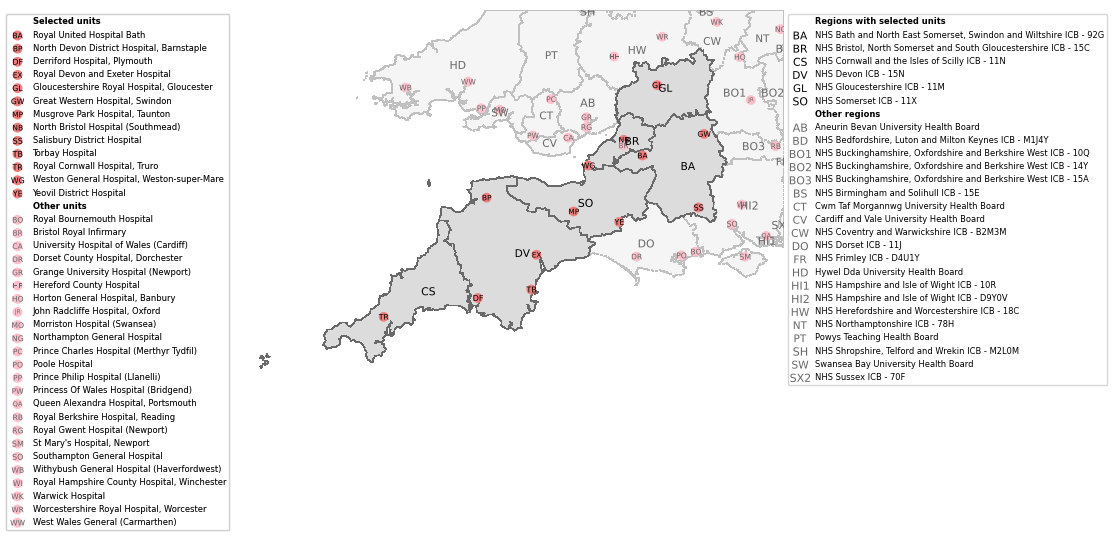

In [8]:
maps.plot_map_selected_regions(
    gdf_boundaries_regions,
    gdf_points_units,
    scenario='drip-and-ship',
    map_extent=map_extent_shared
)

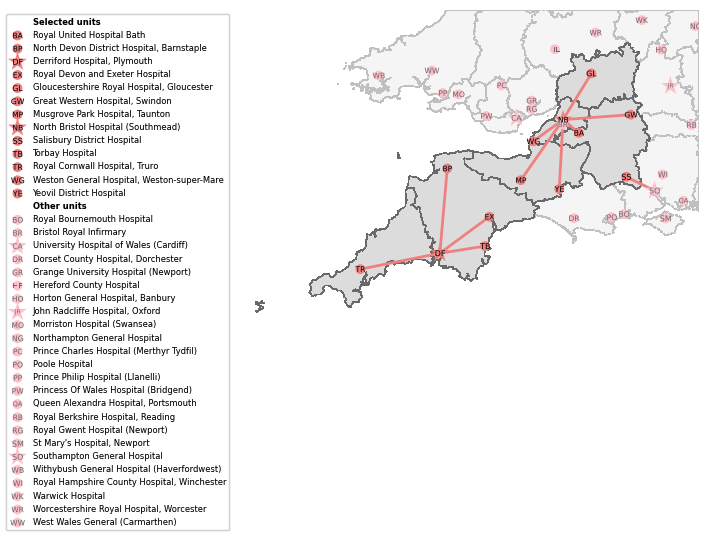

In [9]:
maps.plot_map_selected_units(
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_lines_transfer,
    scenario='drip-and-ship',
    map_extent=map_extent_shared
)

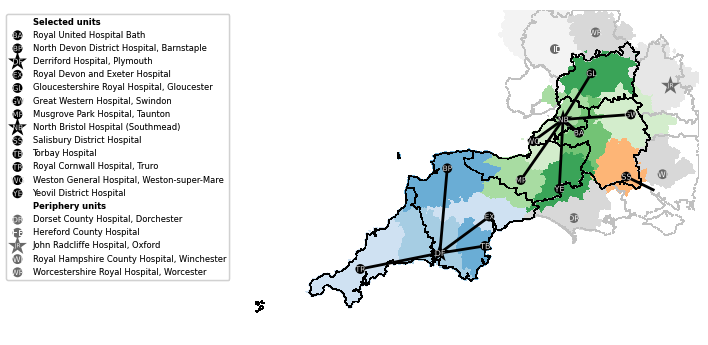

In [10]:
scenario = 'drip-and-ship'

maps.plot_map_catchment(
    gdf_boundaries_catchment,
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_lines_transfer,
    scenario=scenario,
    map_extent=map_extent_shared,
    path_to_file=os.path.join(dir_maps, f'catchment_{scenario}.png')
)

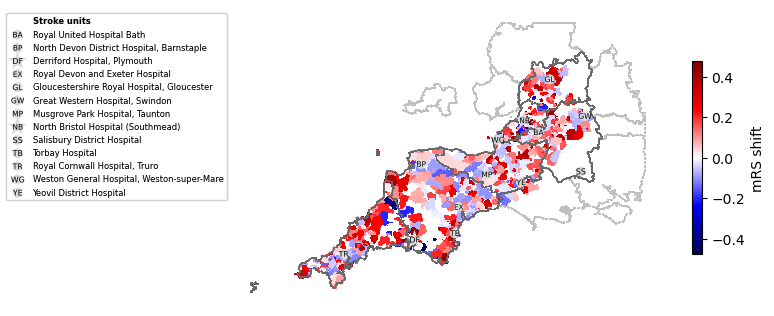

In [11]:
maps.plot_map_outcome(
    gdf_boundaries_lsoa,
    gdf_boundaries_regions,
    gdf_points_units,
    scenario='diff_drip-and-ship_minus_mothership',
    outcome='mRS shift'
)